
# **Evaluating Machine Learning Models for Customer Churn Prediction in Telecom**



## *Machine Learning Models Performance Analysis*

##   Evaluates the efficacy of multiple machine learning models in predicting customer churn using a dataset consisting of 900,000 customer data records (CDRs) from three months of demographic data collected by a telecom company in 2016.

### [Dataset ]     ( https://gitee.com/jian123654/churn_prediction_dataset)

## 1. Importing Libraries

In [ ]:
# System libraries
import time

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, f1_score, recall_score

# Oversampling
from imblearn.over_sampling import RandomOverSampler

# Evaluation
from sklearn.metrics import confusion_matrix

## 2. Preprocessing and Data Exploration


## 2.1     Data **Collection**

In [ ]:
from tabulate import tabulate
import pandas as pd

# Attempt to load the dataset
try:
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv", encoding='utf-8')
except UnicodeDecodeError:
    # If UTF-8 doesn't work, try loading the dataset with latin1 encoding (or 'ISO-8859-1')
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V27.1.csv", encoding='latin1')

# Display the first 3 rows of the DB
print(tabulate(df.head(3), headers='keys', tablefmt='grid'))



+----+-------------------+------------+----------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------------+-------------------------+-------------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-----------------------+-----------------------+-----------------------+----------------------+----------------------+----------------------+------------+------------+-----------+
|    | USER_ID           |   IS_AGREE |   CREDIT_LEVEL |   ACCT_FEE_201601 |   ACCT_FEE_201602 |   ACCT_FEE_201603 |   CALL_DURA_201601 |   CALL_DURA_201602 |   CALL_DURA_201603 |   P2P_SMS_CNT_UP_201601 |   P2P_SMS_CNT_UP_201602 |   P2P_SMS_CNT_UP_201603 |   TOTAL_FLUX_201601 |   TOTAL_FLUX_201602 |   TOTAL_FLUX_201603 |   CALL_DAYS_201601 |   CALL_DAYS_201602 |   CALL_DAYS_201603 |   CALLING_RING_201601 |   CALLING_RING_201602 |

## Output Result:



### To load the dataset from a CSV file, first using the UTF-8 encoding. If this fails, we switch to the   latin1   encoding. After loading the data, we display the first three rows in a table to quickly inspect the dataset's structure.

## 2.2    Missing Values and Duplicate

In [ ]:
import pandas as pd

# Load the dataset with proper encoding
try:
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv", encoding='latin1')

# Check for missing values
print("Missing values statistics:\n")
print(df.isnull().sum())
print("\n" + "-" * 50 + "\n")

# Check for duplicate entries
print("Number of duplicates before:", df.duplicated().sum())

# Drop duplicate rows
df_cleaned = df.drop_duplicates()

# Confirm duplicates are removed
print("Number of duplicates After:", df_cleaned.duplicated().sum())
print("\n" + "-" * 50 + "\n")

print("First 3 rows of the cleaned dataset:\n")
print(df_cleaned.head(3).to_string(index=False))  # Prints the result


Missing values statistics:

USER_ID                  0
IS_AGREE                 0
CREDIT_LEVEL             0
ACCT_FEE_201601          0
ACCT_FEE_201602          0
ACCT_FEE_201603          0
CALL_DURA_201601         0
CALL_DURA_201602         0
CALL_DURA_201603         0
P2P_SMS_CNT_UP_201601    0
P2P_SMS_CNT_UP_201602    0
P2P_SMS_CNT_UP_201603    0
TOTAL_FLUX_201601        0
TOTAL_FLUX_201602        0
TOTAL_FLUX_201603        0
CALL_DAYS_201601         0
CALL_DAYS_201602         0
CALL_DAYS_201603         0
CALLING_RING_201601      0
CALLING_RING_201602      0
CALLING_RING_201603      0
CALLED_RING_201601       0
CALLED_RING_201602       0
CALLED_RING_201603       0
CUST_SEX                 0
CERT_AGE                 0
IS_LOST                  0
dtype: int64

--------------------------------------------------

Number of duplicates before: 0
Number of duplicates After: 0

--------------------------------------------------

First 3 rows of the cleaned dataset:

          USER_ID  IS_AGR

 ## Output Result:


### This section loads the dataset, checks for missing values, and removes any duplicate entries to ensure the data is clean and ready for analysis.

## 2.3  Unique Values

In [ ]:
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv", encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv", encoding='latin1')

# Define categorical columns in your dataset
categorical_columns = [
    "CUST_SEX",
    "IS_AGREE",
    "CREDIT_LEVEL",
    "IS_LOST"
]

# Create a dictionary to store unique values
u_values_dict = {"Column": [], "Unique_Values": []}

# Iterate over the categorical columns
for column in categorical_columns:
    if column in df.columns:
        u_values = df[column].unique()
        u_values_dict["Column"].append(column)
        u_values_dict["Unique_Values"].append(u_values)
    else:
        print(f"Column {column} not found in the dataset.")

# Convert the dictionary to a DataFrame
u_values_df = pd.DataFrame(u_values_dict)

# Display the unique values
print(u_values_df.to_string(index=False))


      Column   Unique_Values
    CUST_SEX          [1, 2]
    IS_AGREE          [0, 1]
CREDIT_LEVEL [67, 65, 66, 0]
     IS_LOST          [0, 1]


## Output Result:

### To identifies and displays the unique values in the categorical columns of the dataset. Since the data for some subscribers is repeated across three months, these parameters remain consistent each month.

## 2.4 Data Preprocessing for Subscriber Analysis


In [ ]:
import pandas as pd

# DB
# dataset = pd.read_csv("/content/drive/MyDrive/DB - Thises/DB--Final.V27.1.csv")

# CUST_SEX
df["CUST_SEX"] = df["CUST_SEX"].map({1: 0, 2: 1})

# If IS_AGREE and IS_LOST are text values, we convert them to numeric
df["IS_AGREE"] = df["IS_AGREE"].map({0: 0, 1: 1})
df["IS_LOST"] = df["IS_LOST"].map({0: 0, 1: 1})

# print dataset
df.head(3)



,USER_ID,IS_AGREE,CREDIT_LEVEL,ACCT_FEE_201601,ACCT_FEE_201602,ACCT_FEE_201603,CALL_DURA_201601,CALL_DURA_201602,CALL_DURA_201603,P2P_SMS_CNT_UP_201601,...,CALL_DAYS_201603,CALLING_RING_201601,CALLING_RING_201602,CALLING_RING_201603,CALLED_RING_201601,CALLED_RING_201602,CALLED_RING_201603,CUST_SEX,CERT_AGE,IS_LOST
0,U3114031824148707,0,67,76.0,85.15,76.00,5882,13586,11901,2,...,29,19,34,30,20,28,29,0,22,0
1,U3114031824148874,1,65,203.8,260.30,311.27,22991,20905,31037,15,...,31,47,37,44,88,58,76,1,30,0
2,U3114031824148975,1,65,166.0,166.10,166.00,13813,18972,27116,19,...,31,29,37,26,23,30,25,1,42,0


 ## Output Result:
### No data has been deleted. Instead, we consolidated the data for subscribers across three months, keeping their unique user IDs together. We selected 14 key features that are crucial for churn prediction, including factors like usage patterns (calls, SMS, data) which may vary each month. These features are recorded in different columns, capturing the behavior of subscribers in each of the three months.

## 2.5  Correlation Heatmap Visualization.

The 'USER_ID' column was not found in the dataframe.
Selected numeric columns: Index(['IS_AGREE', 'CREDIT_LEVEL', 'ACCT_FEE_201601', 'ACCT_FEE_201602',
       'ACCT_FEE_201603', 'CALL_DURA_201601', 'CALL_DURA_201602',
       'CALL_DURA_201603', 'P2P_SMS_CNT_UP_201601', 'P2P_SMS_CNT_UP_201602',
       'P2P_SMS_CNT_UP_201603', 'TOTAL_FLUX_201601', 'TOTAL_FLUX_201602',
       'TOTAL_FLUX_201603', 'CALL_DAYS_201601', 'CALL_DAYS_201602',
       'CALL_DAYS_201603', 'CALLING_RING_201601', 'CALLING_RING_201602',
       'CALLING_RING_201603', 'CALLED_RING_201601', 'CALLED_RING_201602',
       'CALLED_RING_201603', 'CUST_SEX', 'CERT_AGE', 'IS_LOST'],
      dtype='object')


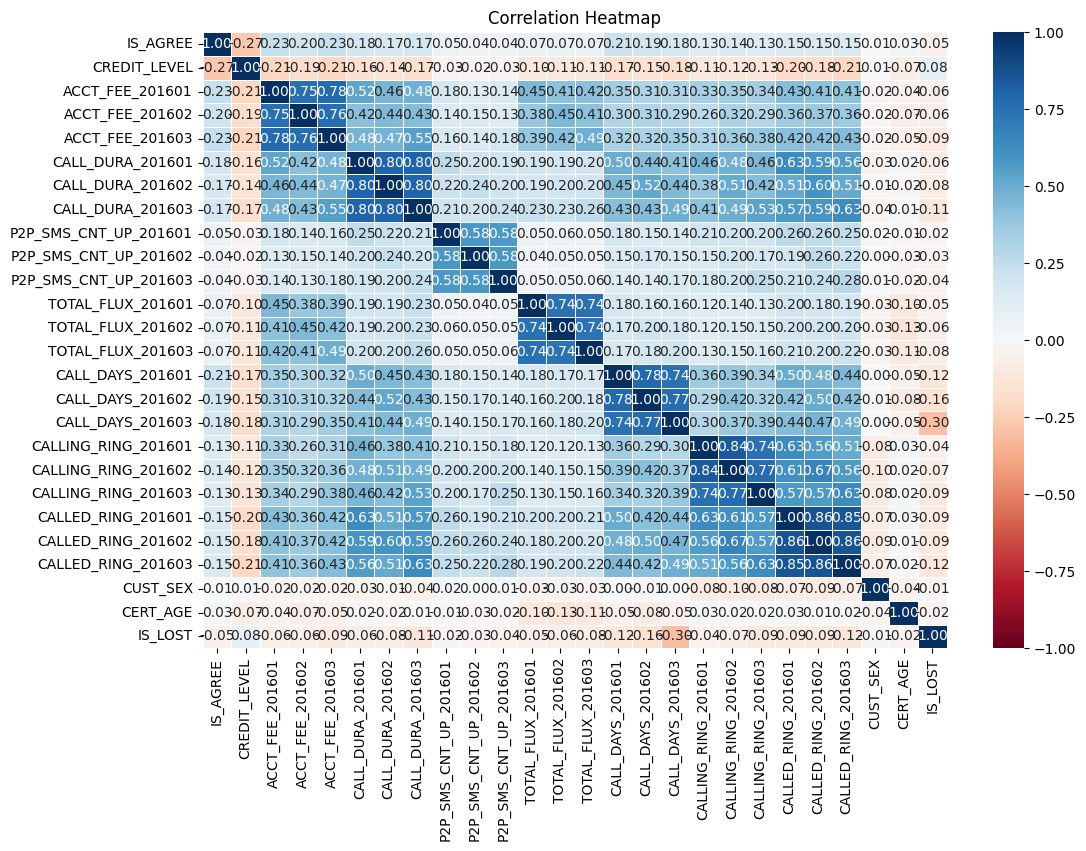

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if 'USER_ID' column is present in the dataframe
if 'USER_ID' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['USER_ID'])
else:
    print("The 'USER_ID' column was not found in the dataframe.")

# Select only numeric columns for analysis
df_numeric = df_cleaned.select_dtypes(include=['number'])

# Print the numeric columns selected to ensure correct selection
print("Selected numeric columns:", df_numeric.columns)

# Calculate the correlation matrix for the numeric data
hmap = df_numeric.corr()

# Set up the plot size and draw the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(hmap, annot=True, fmt=".2f", cmap="RdBu", linewidths=0.5, vmin=-1, vmax=1)

# Add a title and display the heatmap
plt.title("Correlation Heatmap")
plt.show()


##  Code Review:  
  ### The code loads a dataset, removes the 'USER_ID' column if present, and selects only numeric columns. It then computes a correlation matrix to identify relationships between features and displays the results with a heatmap.

## Output Result:

### The heatmap reveals strong positive correlations between features like ACCT_FEE_201601, ACCT_FEE_201602, and ACCT_FEE_201603, suggesting similar patterns. It also shows a strong negative correlation between IS_AGREE and CREDIT_LEVEL, indicating an inverse relationship. These insights can help guide further analysis or modeling.

# 3.  Machin Lerning Models

## 3.1 Load Dataset and define the  Tatget

In [ ]:
import pandas as pd

# Load DB
dataset_path = '/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv'  # specify your file path
dataset = pd.read_csv(dataset_path)

# Remove non-numeric features & separate the target column
features = dataset.drop(columns=['IS_LOST', 'USER_ID'])
target = dataset['IS_LOST']



## 3.2 Random Forest Model



In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import time

# Load DB
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')

# Preprocess data (drop non-numeric & target columns)
features = dataset.drop(columns=['IS_LOST', 'USER_ID'])
target = dataset['IS_LOST']

# Handle class imbalance using SMOTE
smote_handler = SMOTE(sampling_strategy='minority', random_state=42)
features_balanced, target_balanced = smote_handler.fit_resample(features, target)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_balanced, target_balanced, test_size=0.3, random_state=42)

# Standardize data
scaler_tool = StandardScaler()
X_train_scaled = scaler_tool.fit_transform(X_train)
X_test_scaled = scaler_tool.transform(X_test)

# Initialize Random Forest with specific parameters
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Train the model and record time
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_duration = time.time() - start_time

# Predict and calculate probabilities
predictions = rf_model.predict(X_test_scaled)
prediction_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, prediction_probs)
classification_report_text = classification_report(y_test, predictions)

# Display results
print(f"Training Duration (s): {training_duration:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")
print(classification_report_text)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Duration (s): 257.6038
Accuracy: 0.9666
AUC-ROC: 0.9946
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     82709
           1       0.96      0.98      0.97     82651

    accuracy                           0.97    165360
   macro avg       0.97      0.97      0.97    165360
weighted avg       0.97      0.97      0.97    165360



## Code Review:  
### - This implementation uses a  Random Forest classifier  for predicting the target variable, with preprocessing steps including SMOTE to balance class distribution and standardization of features.  
### - The model is trained with specified parameters such as 100 estimators and the Gini criterion, and the training duration is logged.  
### - Evaluation metrics such as accuracy, AUC-ROC score, and a detailed classification report demonstrate the model's effectiveness.  

## Output Result:  
### -  Training Duration: 257.6038 seconds.  
### -  Performance Metrics:  
  ### -  Accuracy:  0.9666.  
  ### -  AUC-ROC Score:  0.9946.  
  ### - Class 0: Precision: 0.98, Recall: 0.96, F1-score: 0.97.  
  ### - Class 1: Precision: 0.96, Recall: 0.98, F1-score: 0.97.  

### The high accuracy and AUC-ROC values highlight strong model performance across both classes.

## 3.3 ADABOOST Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load DB
dataset = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')

# Check columns and define features and target
print(dataset.columns)

# Drop target and optional columns
if 'USER_ID' in dataset.columns:
    X = dataset.drop(columns=['IS_LOST', 'USER_ID'])
else:
    X = dataset.drop(columns=['IS_LOST'])

y = dataset['IS_LOST']  # Target

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.5, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ada_boost, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Index(['USER_ID', 'IS_AGREE', 'CREDIT_LEVEL', 'ACCT_FEE_201601',
       'ACCT_FEE_201602', 'ACCT_FEE_201603', 'CALL_DURA_201601',
       'CALL_DURA_201602', 'CALL_DURA_201603', 'P2P_SMS_CNT_UP_201601',
       'P2P_SMS_CNT_UP_201602', 'P2P_SMS_CNT_UP_201603', 'TOTAL_FLUX_201601',
       'TOTAL_FLUX_201602', 'TOTAL_FLUX_201603', 'CALL_DAYS_201601',
       'CALL_DAYS_201602', 'CALL_DAYS_201603', 'CALLING_RING_201601',
       'CALLING_RING_201602', 'CALLING_RING_201603', 'CALLED_RING_201601',
       'CALLED_RING_201602', 'CALLED_RING_201603', 'CUST_SEX', 'CERT_AGE',
       'IS_LOST'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
48 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 300}
Accuracy Score: 0.8953840970350404
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     55243
           1       0.84      0.78      0.81     21925

    accuracy                           0.90     77168
   macro avg       0.88      0.86      0.87     77168
weighted avg       0.89      0.90      0.89     77168



## Code Review:  
### This script builds a churn prediction model using AdaBoostClassifier, optimized via GridSearchCV. The approach incorporates SMOTE to address class imbalance and splits the resampled data into training and testing sets. The model's hyperparameters, including the number of estimators, learning rate, and algorithm type, are fine-tuned.  

## Output Result:

 ### -  Best Parameters:  Learning Rate: 1.5, Number of Estimators: 300.  
 ### -  Model Performance:  Accuracy: 89.5%.  
### - Class 0 (non-churn): Precision: 91%, Recall: 94%, F1-score: 93%.  
  ### - Class 1 (churn): Precision: 84%, Recall: 78%, F1-score: 81%.  
 ### The overall accuracy of 89.5% indicates reliable prediction capability.

## 3.4 Prediction dual-ensemble model based on RF-Adaboost

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')

# Define features (X) and target (y)
X = df.drop(columns=['IS_LOST', 'USER_ID'])
y = df['IS_LOST']  # Target column

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize individual models
rf = RandomForestClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)

# Create the ensemble model using VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada_boost)],
    voting='soft'
)

# Define hyperparameter grid for Random Forest and AdaBoost
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.5, 1.0, 1.5]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    voting_clf, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'ada__learning_rate': 1.5, 'ada__n_estimators': 200, 'rf__n_estimators': 200}
Accuracy: 0.9513
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     82592
           1       0.93      0.90      0.91     33160

    accuracy                           0.95    115752
   macro avg       0.95      0.93      0.94    115752
weighted avg       0.95      0.95      0.95    115752

Confusion Matrix:
[[80400  2192]
 [ 3443 29717]]



## Code Review:

### This implementation utilizes a dual-ensemble approach by combining  Random Forest  and AdaBoost classifiers within a Voting Classifier framework. The model is fine-tuned with GridSearchCV for hyperparameter optimization, and SMOTE is applied to address class imbalance effectively. The use of soft voting allows the model to average probabilities, improving overall predictions. StandardScaler ensures consistent scaling across features, contributing to better model performance.

## Output Result:  
### The model achieved an  accuracy of 95.13%, demonstrating robust performance. The evaluation metrics reveal:  
-  Class 0 (non-churn): Precision:  96% , Recall:  97% , F1-score:  97%.  
-  Class 1 (churn): Precision:  93% , Recall:  90% , F1-score: 91% .  

The results  indicate the model balances predictions across both classes effectively. The high precision and recall for the minority class (churn) underscore the success of SMOTE in mitigating class imbalance. .

## 3.5 SVM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import time

# Load  dataset
df = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')

df = df.drop(columns=['USER_ID'])

# Preprocessing: Separate features and target variable
X = df.drop('IS_LOST', axis=1)
y = df['IS_LOST']

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, test_size=0.3, random_state=42)

# Initialize the SVM model ( LinearSVC for faster training)
svm_model = LinearSVC(class_weight='balanced', max_iter=5000)

# Record the start time for training
start_time = time.time()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Training time: {training_time:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training time: 1.0294 seconds
Accuracy: 0.8237
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87     82592
           1       0.65      0.83      0.73     33160

    accuracy                           0.82    115752
   macro avg       0.79      0.83      0.80    115752
weighted avg       0.85      0.82      0.83    115752

Confusion Matrix:
[[67795 14797]
 [ 5613 27547]]



##Code Review:  
### The code employs SMOTE for balancing the dataset, PCA for dimensionality reduction, and StandardScaler for feature scaling. A Linear Support Vector Classifier (LinearSVC) is used with balanced class weights to handle the class imbalance. While the approach is efficient and delivers competitive performance, further hyperparameter tuning or alternative techniques might improve precision for the minority class (class 1).

## Output Result:
### The model achieved an accuracy of  82.37%  with a training time of approximately 1.03 seconds. Class 0 (non-churn) demonstrated strong performance, with a precision of 0.92 and a recall of 0.82. For class 1 (churn), the model achieved a  precision of 0.65 and a recall of 0.83, indicating that SMOTE effectively addressed class imbalance. PCA reduced dimensionality, contributing to faster computation.

## 3.6 BPNN Model

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score
import time
import warnings

# Suppress warnings and TensorFlow logs
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow logs
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/DB - Thises/DB--Final.V28.1 Final.csv')

# Feature columns and target column
features = ['CREDIT_LEVEL', 'ACCT_FEE_201601', 'ACCT_FEE_201602', 'ACCT_FEE_201603', 'CALL_DURA_201601',
            'CALL_DURA_201602', 'CALL_DURA_201603', 'P2P_SMS_CNT_UP_201601', 'P2P_SMS_CNT_UP_201602',
            'P2P_SMS_CNT_UP_201603', 'TOTAL_FLUX_201601', 'TOTAL_FLUX_201602', 'TOTAL_FLUX_201603',
            'CALL_DAYS_201601', 'CALL_DAYS_201602', 'CALL_DAYS_201603', 'CALLING_RING_201601',
            'CALLING_RING_201602', 'CALLING_RING_201603', 'CALLED_RING_201601', 'CALLED_RING_201602',
            'CUST_SEX', 'CERT_AGE']
target = 'IS_LOST'

# Separate features and target
X = data[features]
y = data[target]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Build the BPNN model
model = Sequential([
    Input(shape=(X_train_smote.shape[1],)),
    Dense(12, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Track the time of training
start_time = time.time()

# Train the model with verbose=0 to suppress training logs
model.fit(X_train_smote, y_train_smote, epochs=300, batch_size=32, verbose=0)

# Track the end time and calculate the elapsed time
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

# Evaluate the model
y_pred = (model.predict(X_test, verbose=0) > 0.5).astype(int)

# Print the evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Training time: 5298.89 seconds
Accuracy: 0.9244793037497149
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96     55103
           1       0.24      0.60      0.35      1888

    accuracy                           0.92     56991
   macro avg       0.61      0.77      0.65     56991
weighted avg       0.96      0.92      0.94     56991



## Code Review:
### This code constructs a Backpropagation Neural Network (BPNN) for customer churn prediction. To address class imbalance, SMOTE is utilized, and the model is trained using standardized features with a sigmoid activation function for binary classification.

## Output Result:
### The BPNN achieved an overall accuracy of 92.44%, with a recall of 60% and a precision of 24% for the minority class (churn). For the majority class (non-churn), the model reached a precision of 99% and a recall of 94%, demonstrating strong performance for the dominant class but limited precision for identifying churners